In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score



insurance=pd.read_csv('https://raw.githubusercontent.com/KeithGalli/Regression-Example/refs/heads/master/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


In [5]:
# TASK-1 Clean up the data
## - are there any missing values?
## - Standardize categories in region
## - Standardize sex to just two categories
## - Standardize charges data type (float)

insurance_filled=insurance.dropna()
insurance_filled['region']=insurance_filled['region'].str.lower()

# update my 'sex' column values to be replaced based on the gender_map dictionary
FEMALE='female'
MALE='male'
gender_map={'F':FEMALE, 'woman':FEMALE,'man':MALE,'M':MALE}

insurance_filled['sex']=insurance_filled['sex'].replace(gender_map)

# Change smoker column to boolean to work easier
insurance_filled['smoker']=(insurance_filled['smoker']=='yes')

# - Standardize charges data type to float

insurance_filled['charges']=insurance_filled['charges'].str.strip('$').astype('float64')

# Make positive values for all columns

insurance_pos= insurance_filled.apply(lambda x: x.abs() if np.issubdtype(x.dtype, np.number) else x)

insurance_pos.sample(10)

C:\Users\User\AppData\Local\Temp\ipykernel_4904\3426713010.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_filled['region']=insurance_filled['region'].str.lower()
C:\Users\User\AppData\Local\Temp\ipykernel_4904\3426713010.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_filled['sex']=insurance_filled['sex'].replace(gender_map)
C:\Users\User\AppData\Local\Temp\ipykernel_4904\3426713010.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

,age,sex,bmi,children,smoker,region,charges
1306,29.0,female,21.850,0.0,True,northeast,16115.30450
1307,32.0,male,28.120,4.0,True,northwest,21472.47880
577,31.0,female,38.095,1.0,True,northeast,58571.07448
1078,28.0,male,31.680,0.0,True,southeast,34672.14720
424,48.0,male,30.200,2.0,False,southwest,8968.33000
248,19.0,male,20.900,1.0,False,southwest,1832.09400
857,25.0,male,24.130,0.0,True,northwest,15817.98570
1261,28.0,male,37.100,1.0,False,southwest,3277.16100
699,23.0,female,39.270,2.0,False,southeast,3500.61230
1302,25.0,female,20.800,1.0,False,southwest,3208.78700


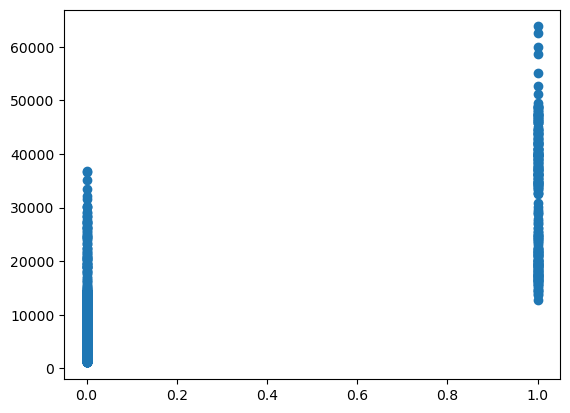

In [10]:
# TASK 2 problem
# Scatterplots of relationships between variables & charges

import matplotlib.pyplot as plt
df=insurance_pos.copy()

plt.scatter(df['smoker'],df['charges'])


In [19]:
# Task 3 - Prepare the data for model fitting

df_new=pd.get_dummies(df,prefix=['region'],columns=['region'])
df_new=df_new.drop(columns=['region_southeast'])
df_new['smoker']=df_new['smoker'].astype('int64')

df_new['is_male']=(df_new['sex']=='male').astype('int64')
df_new=df_new.drop(columns=['sex'])

df_new=df_new.dropna()

df_new.head()


,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest,is_male
0,19.0,27.900,0.0,1,16884.92400,0,0,1,0
1,18.0,33.770,1.0,0,1725.55230,0,0,0,1
2,28.0,33.000,3.0,0,4449.46200,0,0,0,1
3,33.0,22.705,0.0,0,21984.47061,0,1,0,1
4,32.0,28.880,0.0,0,3866.85520,0,1,0,1


In [26]:
# Task 4 Fit a linear regression model to our data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score    

# Define input and output variables
X = df_new.drop(columns=['charges'])
y = df_new['charges']

print(df_new.info())
print(y.info())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R squared score
r2_score = r2_score(y_test, y_pred)

# Output the mean squared error
r2_score

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1207 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1207 non-null   float64
 1   bmi               1207 non-null   float64
 2   children          1207 non-null   float64
 3   smoker            1207 non-null   int64  
 4   charges           1207 non-null   float64
 5   region_northeast  1207 non-null   uint8  
 6   region_northwest  1207 non-null   uint8  
 7   region_southwest  1207 non-null   uint8  
 8   is_male           1207 non-null   int64  
dtypes: float64(4), int64(2), uint8(3)
memory usage: 69.5 KB
None
<class 'pandas.core.series.Series'>
Int64Index: 1207 entries, 0 to 1337
Series name: charges
Non-Null Count  Dtype  
--------------  -----  
1207 non-null   float64
dtypes: float64(1)
memory usage: 18.9 KB
None


0.7049323160872817

In [30]:
def preprocess_df(df):
    df_new=pd.get_dummies(df,prefix=['region'],columns=['region'])
    df_new=df_new.drop(columns=['region_southeast'])
    df_new['smoker']=(df_new['smoker']=='yes')
    df_new['smoker']=df_new['smoker'].astype('int64')

    df_new['is_male']=(df_new['sex']=='male').astype('int64')
    df_new=df_new.drop(columns=['sex'])

    return df_new



In [32]:
# Validate the model


val_df=pd.read_csv('https://raw.githubusercontent.com/KeithGalli/Regression-Example/refs/heads/master/validation_dataset.csv')
input_df=preprocess_df(val_df)

predictions=model.predict(input_df)

validation_data=val_df.copy()

validation_data['predicted_charges']=predictions

validation_data

,age,sex,bmi,children,smoker,region,predicted_charges
0,18.0,female,24.090000,1.0,no,southeast,352.537878
1,39.0,male,26.410000,0.0,yes,northeast,30956.214707
2,27.0,male,29.150000,0.0,yes,southeast,27799.409607
3,71.0,male,65.502135,13.0,yes,southeast,57194.414804
4,28.0,male,38.060000,0.0,no,southeast,6685.426312
5,70.0,female,72.958351,11.0,yes,southeast,58677.838443
6,29.0,female,32.110000,2.0,no,northwest,7044.405963
7,42.0,female,41.325000,1.0,no,northeast,13065.658004
8,48.0,female,36.575000,0.0,no,northwest,12665.703636
9,63.0,male,33.660000,3.0,no,southeast,16142.541083
